In [1]:
# %cd ../../../..

In [2]:
import os
import json
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
base_results_path = "dotless_arabic/experiments/nlms/results"
results_dict = {}
for dataset_name in os.listdir(base_results_path):
    for tokenizer_class in os.listdir(f'{base_results_path}/{dataset_name}'):
        for results_file in os.listdir(f"{base_results_path}/{dataset_name}/{tokenizer_class}"):
            if not os.path.isfile(f"{base_results_path}/{dataset_name}/{tokenizer_class}/{results_file}"):
                continue
            if 'vocab_coverage_0.95' not in results_file or 'not_used' in results_file:
                continue
            with open(f"{base_results_path}/{dataset_name}/{tokenizer_class}/{results_file}") as results:
                text_type = results_file.split(".")[0].split("_")[0]
                content = results.read()
                considered_vocab = ''
                vocab_size = ''
                all_vocab = ''
                sequence_length = ''
                training_ppl = ''
                validation_ppl = ''
                test_ppl = ''
                # ppl = ''
                training_time = ''
                training_time_per_epoch = ''
                params = ''
                model_size = ''
                for line in content.splitlines():
                    if 'Tokenizer Vocab Size' in line:
                        vocab_size = line.split(':')[-1].strip()
                    # if line.startswith('Considered Vocab:'):
                    #     considered_vocab = line.split(':')[-1].strip()
                    # elif line.startswith('All Vocab:'):
                    #     all_vocab = line.split(':')[-1].strip()
                    elif line.startswith('Sequence Length:'):
                        sequence_length = line.split(':')[-1].strip()
                    # elif line.startswith('Training Perplexity:'):
                    #     training_ppl = line.split(':')[-1].strip()
                    elif 'test_ppl/dataloader_idx_0' in line:
                        training_ppl = round(float(line.split(':')[-1].strip().strip(',')),2)
                    elif 'test_ppl/dataloader_idx_1' in line:
                        validation_ppl = round(float(line.split(':')[-1].strip().strip(',')),2)
                    elif 'test_ppl/dataloader_idx_2' in line:
                        test_ppl = round(float(line.split(':')[-1].strip().strip(',')),2)
                    # elif line.startswith('Perplexity with OOVs:'):
                    #     ppl = line.split(':')[-1].strip()
                    elif line.startswith('Training Time:'):
                        training_time = line.split(':')[-1].strip()
                    elif line.startswith('Average training Time for one epoch:'):
                        training_time_per_epoch = line.split(':')[-1].strip()
                    elif 'Total params' in line:
                        params = ' '.join(line.split()[:2])
                    elif 'Total estimated model params size (MB)' in line:
                        model_size = line.split(' ')[0]
                    
                if not results_dict.get(tokenizer_class):
                    results_dict[tokenizer_class] = {}
                if not results_dict[tokenizer_class].get(dataset_name):
                    results_dict[tokenizer_class][dataset_name] = {}
                results_dict[tokenizer_class][dataset_name].update(
                    {
                        text_type: {
                            # 'considered_vocab':considered_vocab,
                            # 'all_vocab':all_vocab,
                            vocab_size:vocab_size,
                            'sequence_length':sequence_length,
                            'training_ppl':training_ppl,
                            'validation_ppl':validation_ppl,
                            'test_ppl':test_ppl,
                            # 'ppl':ppl,
                            'training_time':training_time,
                            'training_time_per_epoch':training_time_per_epoch,
                            'params':params,
                            'model_size':model_size,
                        }
                    }
                )
pprint(results_dict)

{'CharacterTokenizer': {'news_dataset': {'dotted': {'36': '36',
                                                    'model_size': '13.732',
                                                    'params': '3.4 M',
                                                    'sequence_length': '429',
                                                    'test_ppl': 3.17,
                                                    'training_ppl': 3.17,
                                                    'training_time': '49853.620 '
                                                                     'seconds',
                                                    'training_time_per_epoch': '8308.936 '
                                                                               'seconds',
                                                    'validation_ppl': 3.18},
                                         'undotted': {'24': '24',
                                                      'model_size': '13.707',
   

In [4]:
datasets_names = [
    "quran_dataset",
    "sanadset_hadeeth_dataset",
    "poems_dataset",
    "news_dataset",
    "wikipedia_dataset",
]
for tokenizer_class in sorted(results_dict.keys(), reverse=True):
    for dataset_name in datasets_names:
        for text_type in sorted(results_dict[tokenizer_class][dataset_name]):
            result = results_dict[tokenizer_class][dataset_name][text_type]
            print(
                f'{tokenizer_class.replace("Tokenizer","")},',
                f'{dataset_name.replace("_dataset","")},',
                f"{text_type}:\n",
                '\n',
                # f'V: {result["all_vocab"]}\n',
                # f'V_: {result["considered_vocab"]}\n',
                # f'(V_/V): {float(result["considered_vocab"].replace(",",""))/float(result["all_vocab"].replace(",","")):.2f}\n',
                f'PPL: {float(result["test_ppl"]) if result["test_ppl"] else -1:.2f}\n',
            )
            if text_type.startswith('un'):
                dotted_ppl = 0
                undotted_ppl = 0
                if results_dict[tokenizer_class][dataset_name]['dotted']['test_ppl']:
                    dotted_ppl = float(results_dict[tokenizer_class][dataset_name]['dotted']['test_ppl'])
                if results_dict[tokenizer_class][dataset_name]['undotted']['test_ppl']:
                    undotted_ppl = float(results_dict[tokenizer_class][dataset_name]['undotted']['test_ppl'])
                if dotted_ppl and undotted_ppl:
                    print('undotted/dotted PPL raio:',f'{undotted_ppl/dotted_ppl:.2f}')
                else:
                    print('N/A')
                print('-'*80)
    print("-" * 120)

Word, quran, dotted:
 
 PPL: 179.02

Word, quran, undotted:
 
 PPL: 195.69

undotted/dotted PPL raio: 1.09
--------------------------------------------------------------------------------
Word, sanadset_hadeeth, dotted:
 
 PPL: 33.11

Word, sanadset_hadeeth, undotted:
 
 PPL: 35.85

undotted/dotted PPL raio: 1.08
--------------------------------------------------------------------------------
Word, poems, dotted:
 
 PPL: 1196.17

Word, poems, undotted:
 
 PPL: 1020.98

undotted/dotted PPL raio: 0.85
--------------------------------------------------------------------------------
Word, news, dotted:
 
 PPL: 166.90

Word, news, undotted:
 
 PPL: 179.09

undotted/dotted PPL raio: 1.07
--------------------------------------------------------------------------------
Word, wikipedia, dotted:
 
 PPL: 290.25

Word, wikipedia, undotted:
 
 PPL: 296.18

undotted/dotted PPL raio: 1.02
--------------------------------------------------------------------------------
--------------------------------

In [5]:
for tokenizer_class in sorted(results_dict.keys(), reverse=True):
    for dataset_name in datasets_names:
        for text_type in sorted(results_dict[tokenizer_class][dataset_name]):
            result = results_dict[tokenizer_class][dataset_name][text_type]
            print(tokenizer_class,dataset_name,text_type)
            print(result['training_time'])
        print('-'*120)

WordTokenizer quran_dataset dotted
178.239 seconds
WordTokenizer quran_dataset undotted
188.116 seconds
------------------------------------------------------------------------------------------------------------------------
WordTokenizer sanadset_hadeeth_dataset dotted
34081.951 seconds
WordTokenizer sanadset_hadeeth_dataset undotted
21219.100 seconds
------------------------------------------------------------------------------------------------------------------------
WordTokenizer poems_dataset dotted
14466.509 seconds
WordTokenizer poems_dataset undotted
8268.047 seconds
------------------------------------------------------------------------------------------------------------------------
WordTokenizer news_dataset dotted
72084.941 seconds
WordTokenizer news_dataset undotted
56822.424 seconds
------------------------------------------------------------------------------------------------------------------------
WordTokenizer wikipedia_dataset dotted
51926.414 seconds
WordTokenize

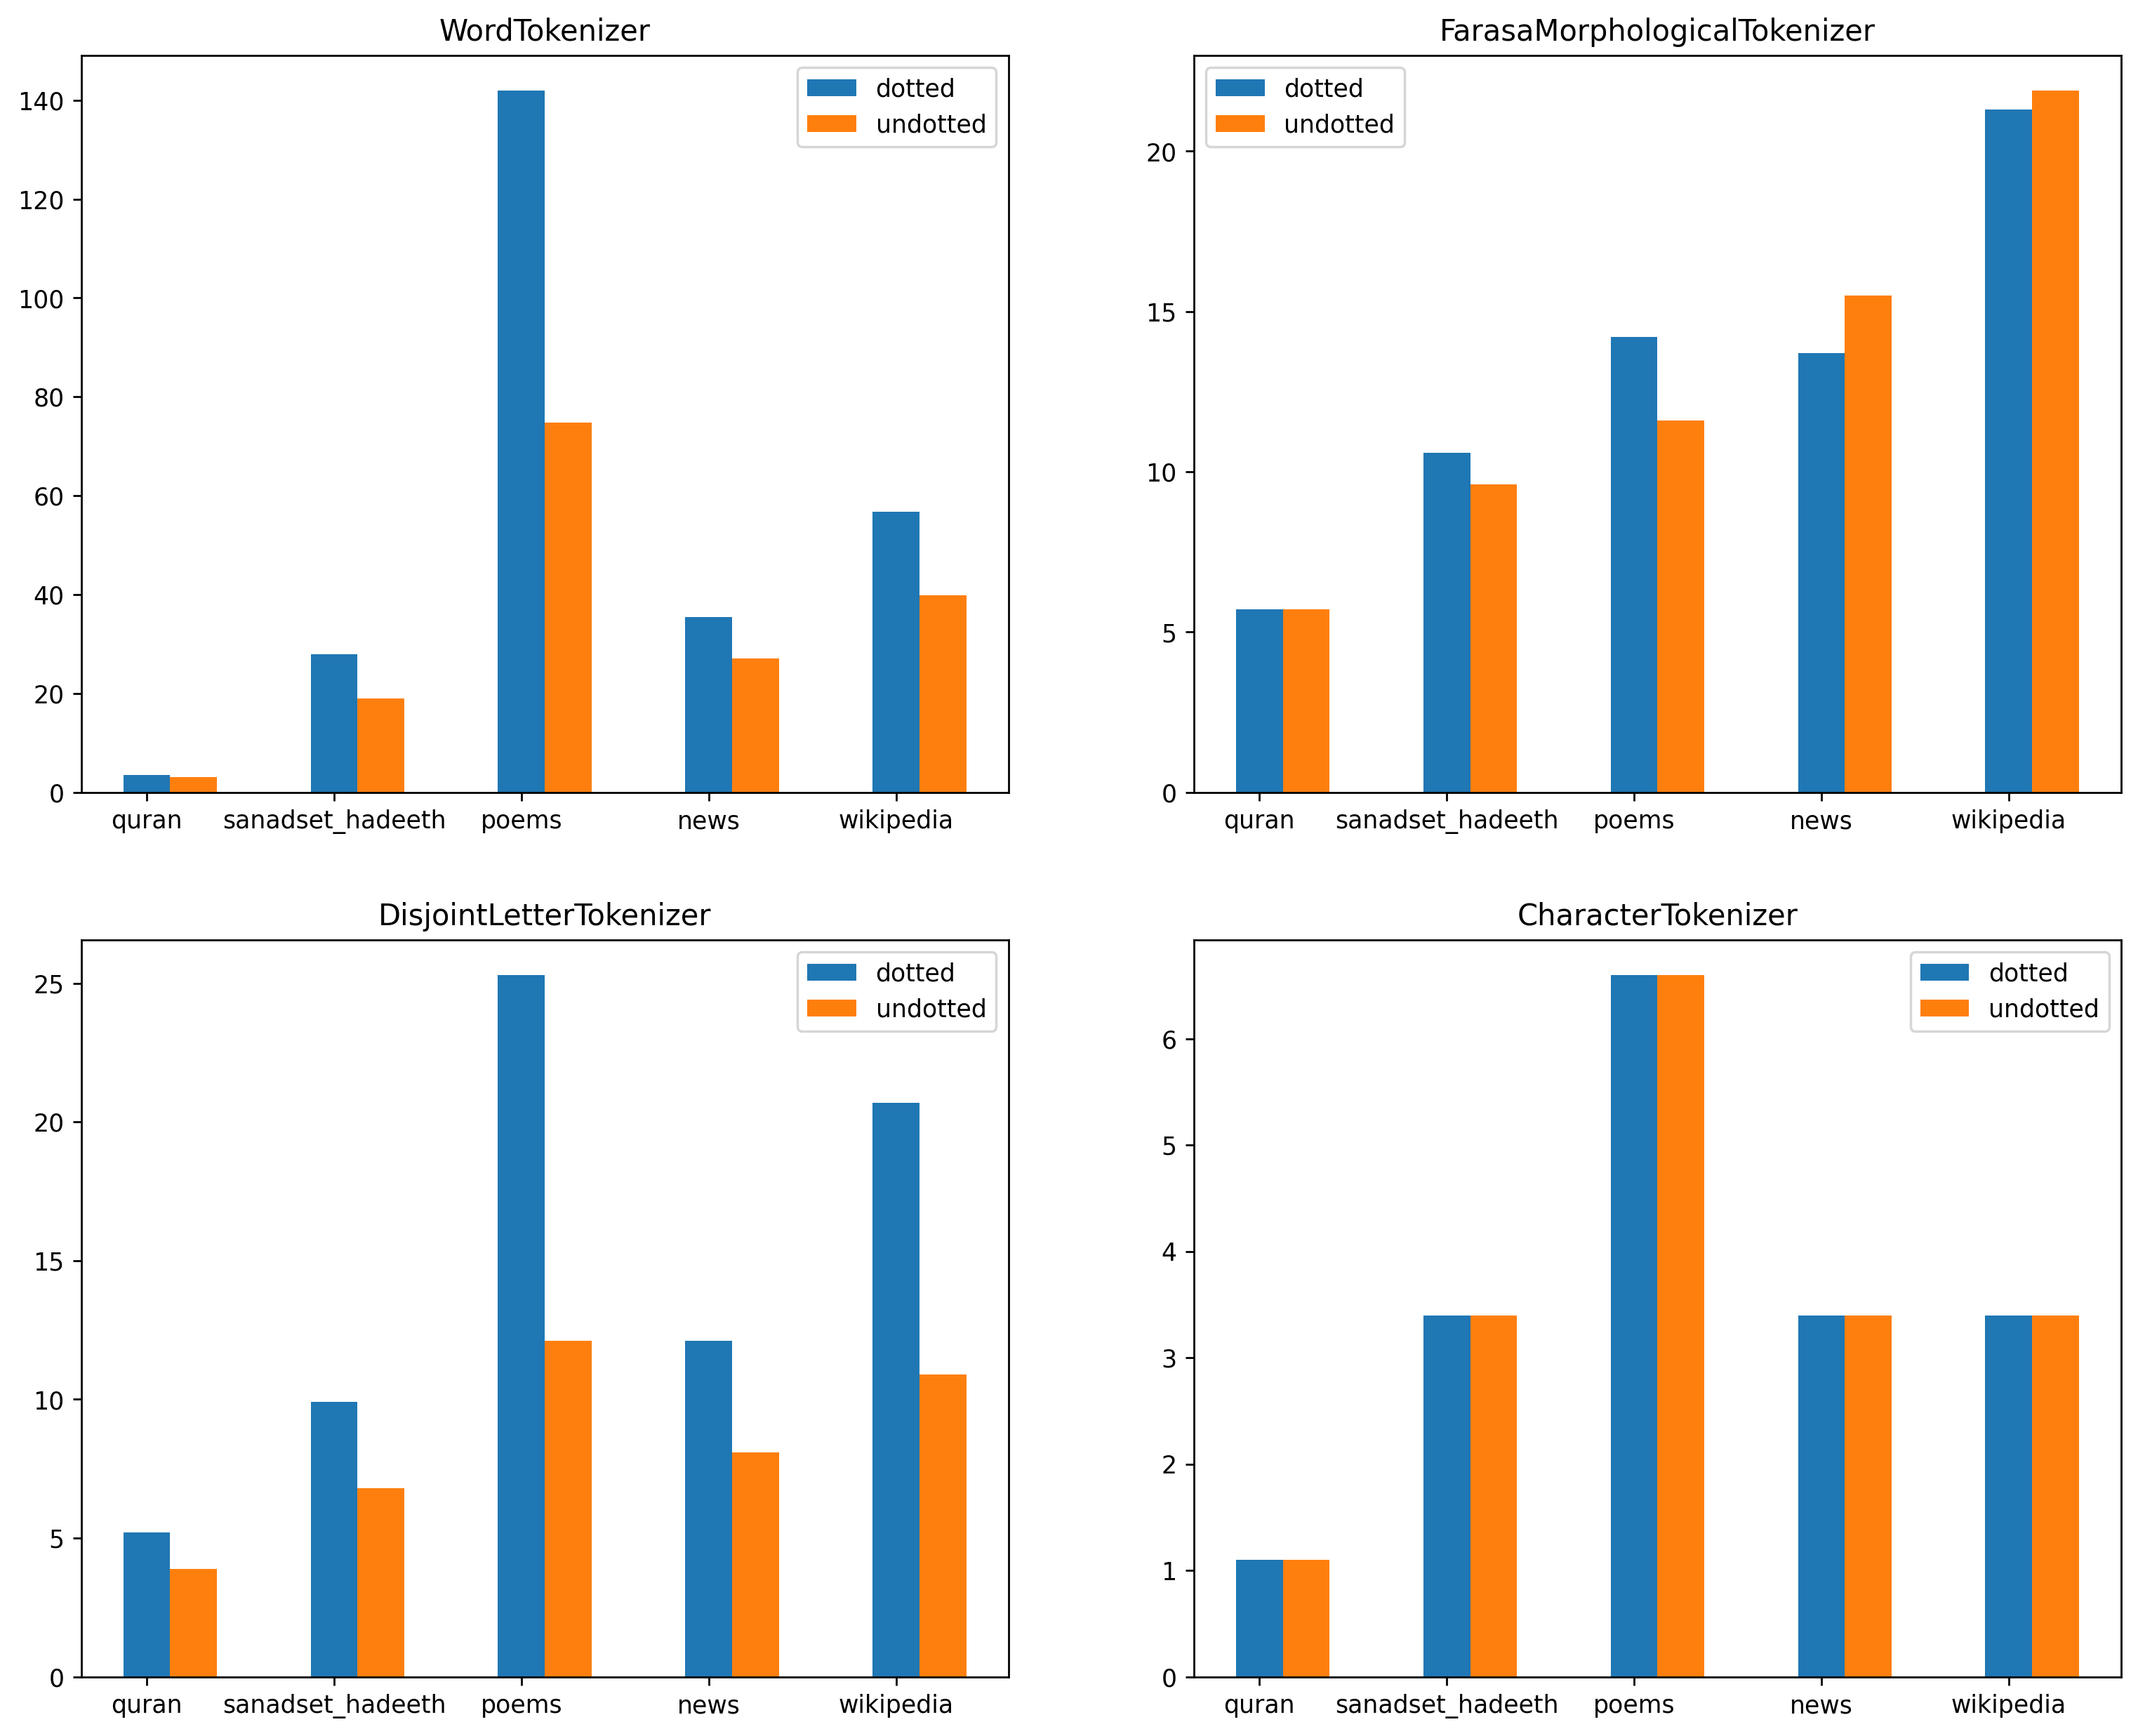

In [6]:
figure,axis = plt.subplots(nrows=2,ncols=2,dpi=250,figsize=(15,12))

# metric = 'model_size'
metric = 'params'

for tokenizer_index,tokenizer_class in enumerate(sorted(results_dict.keys(), reverse=True)):

    dotted_sizes = list()
    undotted_sizes = list()
    for dataset_name in datasets_names:
        dotted_sizes.append(results_dict[tokenizer_class][dataset_name]['dotted'][metric])
        undotted_sizes.append(results_dict[tokenizer_class][dataset_name]['undotted'][metric])

    names = list(map(lambda name: name.replace('_dataset',''),datasets_names))

    dotted_sizes = list(map(lambda item:float(item.split(' ')[0]),dotted_sizes))
    undotted_sizes = list(map(lambda item:float(item.split(' ')[0]),undotted_sizes))

    # dotted_sizes = list(map(float,dotted_sizes))
    # undotted_sizes = list(map(float,undotted_sizes))
    axis[tokenizer_index//2,tokenizer_index%2].set_title(tokenizer_class)
    axis[tokenizer_index//2,tokenizer_index%2].bar(names,dotted_sizes,width=0.25, label='dotted')
    axis[tokenizer_index//2,tokenizer_index%2].bar(np.arange(len(names))+0.25,undotted_sizes,width=0.25,label='undotted')
    axis[tokenizer_index//2,tokenizer_index%2].legend()